In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ler os dados

In [2]:
# Ler o ficheiro
#file_path_csv = 'ckd_uci_extra.csv'
file_path_csv = 'ckd_uci.csv'

# Construir o dataframe
data = pd.read_csv(file_path_csv, sep=';')

# Mostrar as primeiras linhas e a estrutura do conjunto de dados
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300.0,4.6,no,no,no,good,no,no,ckd


# Análise dos Dados

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              450 non-null    int64  
 1   age             441 non-null    float64
 2   bp              438 non-null    float64
 3   sg              403 non-null    float64
 4   al              404 non-null    float64
 5   su              401 non-null    float64
 6   rbc             283 non-null    object 
 7   pc              385 non-null    object 
 8   pcc             446 non-null    object 
 9   ba              446 non-null    object 
 10  bgr             406 non-null    float64
 11  bu              431 non-null    float64
 12  sc              433 non-null    float64
 13  sod             363 non-null    float64
 14  pot             362 non-null    float64
 15  hemo            398 non-null    float64
 16  pcv             380 non-null    object 
 17  wc              344 non-null    flo

In [4]:
# converter o atributo pcv para numérico porque assume como categórico
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')

data['pcv'] = data['pcv'].astype('float64')

print("\nTipo de dados finais:")
print(data.dtypes)
print(data.head())


Tipo de dados finais:
id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object
   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    n

In [5]:
#alterar valores do cad e dm que tem \t
data['cad'] = data['cad'].str.strip().str.replace(r'\t', '', regex=True)
data['dm'] = data['dm'].str.strip().str.replace(r'\t', '', regex=True)

In [6]:
# Contar valores nulos por coluna
print("\nValores nulos por coluna:\n", data.isnull().sum())



Valores nulos por coluna:
 id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               167
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [7]:
# Estatísticas descritivas para colunas numéricas
print("\nEstatísticas descritivas (numéricas):\n", data.describe())

# Estatísticas descritivas para colunas categóricas
print("\nEstatísticas descritivas (categóricas):\n", data.describe(include='object'))


Estatísticas descritivas (numéricas):
                id         age          bp          sg          al          su  \
count  450.000000  441.000000  438.000000  403.000000  404.000000  401.000000   
mean   224.500000   51.247166   76.847032    1.017283    1.138614    0.498753   
std    130.048068   16.334574   13.061091    0.005795    1.353460    1.091157   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%    112.250000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    224.500000   54.000000   80.000000    1.020000    1.000000    0.000000   
75%    336.750000   63.000000   80.000000    1.020000    2.000000    0.000000   
max    449.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  \
count  406.000000  431.000000  433.000000  363.000000  362.000000  398.000000   
mean   144.866995   54.805568    2.851617  137.593664    4.570442   

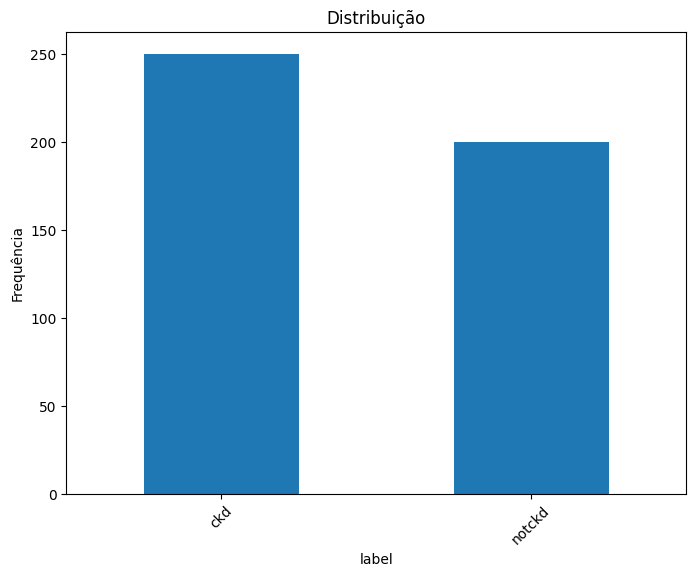

In [8]:
# Ver o equilíbrio/desequilíbrio do label (coluna "classification")

data["classification"].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title("Distribuição")
plt.xlabel("label")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Verificar distribuição do label

distribuicao= data["classification"].value_counts()
print("\nDistribuição da classe:\n", distribuicao)


Distribuição da classe:
 classification
ckd       250
notckd    200
Name: count, dtype: int64


In [10]:
# Calcular percentagens

proporcao = distribuicao/ distribuicao.sum() * 100
print("\nProporção de casos (em %):\n", proporcao)


Proporção de casos (em %):
 classification
ckd       55.555556
notckd    44.444444
Name: count, dtype: float64


## Identificar padrões ou correlações entre atributos

Matriz de correlação

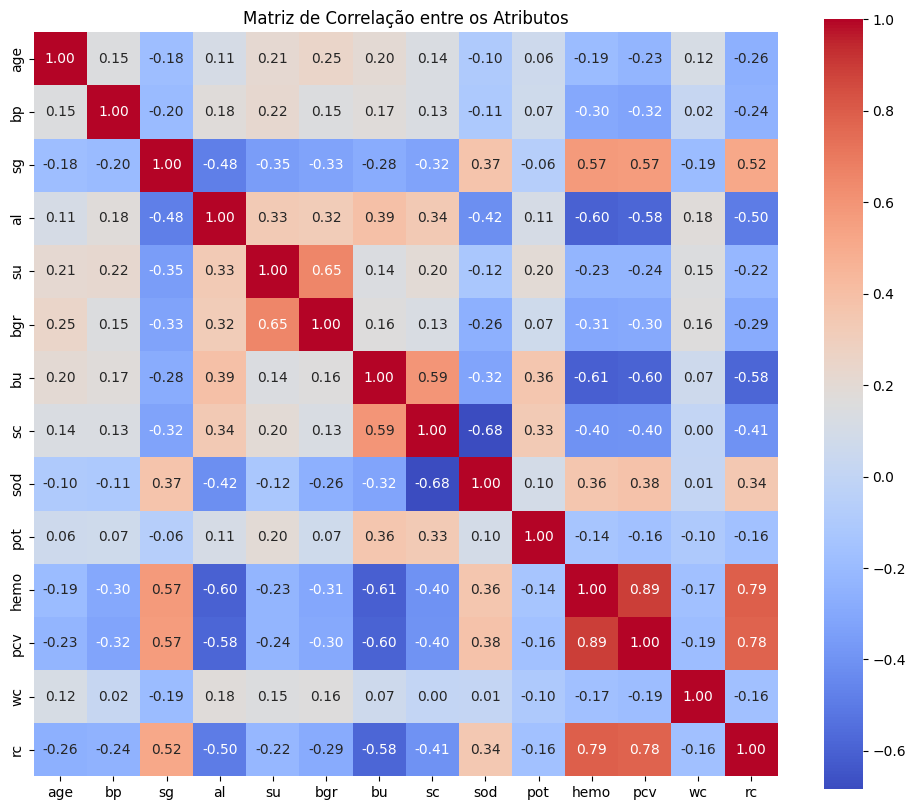

In [11]:
# Remover colunas irrelevantes para a correlação
data_corr = data.drop(columns=["id", "classification"])

# não faz sentido ter na correlação atributos binominais e polinominais (certo??)
data_numeric = data_corr.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = data_numeric.corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 10))

# Criar o heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matriz de Correlação entre os Atributos")
plt.show()

#  Processamento de dados

## Tratamento dos missing values

Duas opções:
 - substituir pela média/moda (em todos)
 - remover o atributo se a percentagem de dados em falta for superior a 30% e substituir nos outros (fizemos isto na aula de python)

Testar e comparar os resultados com outras opções??

In [12]:
# Verificar valores em falta
valores_nulos = data.isnull().sum()
proporcao_nulos = (valores_nulos / len(data)) * 100

# Exibir proporção de valores nulos por atributo
print("Proporção de valores nulos por atributo:\n", proporcao_nulos)

Proporção de valores nulos por atributo:
 id                 0.000000
age                2.000000
bp                 2.666667
sg                10.444444
al                10.222222
su                10.888889
rbc               37.111111
pc                14.444444
pcc                0.888889
ba                 0.888889
bgr                9.777778
bu                 4.222222
sc                 3.777778
sod               19.333333
pot               19.555556
hemo              11.555556
pcv               15.777778
wc                23.555556
rc                29.111111
htn                0.444444
dm                 0.444444
cad                0.444444
appet              0.222222
pe                 0.222222
ane                0.222222
classification     0.000000
dtype: float64


In [13]:
# 1ª opção -> substituir pela média/moda em todos os atributos

# Criar dataset onde valores em falta são substituídos pela média ou moda
data_subs = data.copy()

# Substituir valores nulos nas colunas restantes
for coluna in data_subs.columns:
    if data_subs[coluna].isnull().sum() > 0:
        if data_subs[coluna].dtype in ["int64", "float64"]:  # Atributos numéricos
            substituto = data_subs[coluna].mean()
        else:  # Atributos categóricos
            substituto = data_subs[coluna].mode()[0]
        data_subs[coluna].fillna(substituto, inplace=True)

# Verificar se ainda existem valores nulos
valores_nulos_restantes = data_subs.isnull().sum().sum()
print(f"\nValores nulos restantes no dataset: {valores_nulos_restantes}")


Valores nulos restantes no dataset: 0


In [14]:
# 2ª opcão - remover o atributo se a percentagem de dados em falta for superior a 30% e substituir nos outros

# Remover atributos com mais de 30% de valores nulos
limite_remocao = 30
atributos_removidos = proporcao_nulos[proporcao_nulos > limite_remocao].index
data_rmv = data.drop(columns=atributos_removidos)

print(f"\nAtributos removidos (mais de {limite_remocao}% de valores nulos): {list(atributos_removidos)}")

# Substituir valores nulos nas colunas restantes
for coluna in data_rmv.columns:
    if data_rmv[coluna].isnull().sum() > 0:
        if data_rmv[coluna].dtype in ["int64", "float64"]:  # Atributos numéricos
            substituto = data_rmv[coluna].mean()
        else:  # Atributos categóricos
            substituto = data_rmv[coluna].mode()[0]
        data_rmv[coluna].fillna(substituto, inplace=True)

# Verificar se ainda existem valores nulos
valores_nulos_restantes = data_rmv.isnull().sum().sum()
print(f"\nValores nulos restantes no dataset: {valores_nulos_restantes}")


Atributos removidos (mais de 30% de valores nulos): ['rbc']

Valores nulos restantes no dataset: 0


In [15]:
# para verificar como ficam

print("Dataset original:")
print(data.head())
print("\nDataset com valores preenchidos (média/moda):")
print(data_subs.head())
print("\nDataset com atributos removidos (>30% missing):")
print(data_rmv.head())

Dataset original:
   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane classification  
0  ...  44.0  7800.0  5.2  yes  yes   no   good   no   no            ckd  
1  ...  38.0  6000.0  NaN   no   no   no   good   no   no            ckd  
2  ...  31.0  7500.0  NaN   no  yes   no   poor   no  yes            ckd  
3  ...  32.0  6700.0  3.9  yes   no   no   poor  yes  yes            ckd  
4  ...  35.0  7300.0  4.6   no   no   no   good   no   no            ckd  

[5 rows x 26 columns]

Dataset com valores preench

In [16]:
# para o k-means

numeric_features_n_escalado = data_subs.select_dtypes(include=[np.number])

numeric_features_n_escalado = numeric_features_n_escalado.drop(columns = ['id'])

print(numeric_features_n_escalado.head())

    age    bp     sg   al   su         bgr    bu   sc         sod       pot  \
0  48.0  80.0  1.020  1.0  0.0  121.000000  36.0  1.2  137.593664  4.570442   
1   7.0  50.0  1.020  4.0  0.0  144.866995  18.0  0.8  137.593664  4.570442   
2  62.0  80.0  1.010  2.0  3.0  423.000000  53.0  1.8  137.593664  4.570442   
3  48.0  70.0  1.005  4.0  0.0  117.000000  56.0  3.8  111.000000  2.500000   
4  51.0  80.0  1.010  2.0  0.0  106.000000  26.0  1.4  137.593664  4.570442   

   hemo   pcv      wc        rc  
0  15.4  44.0  7800.0  5.200000  
1  11.3  38.0  6000.0  4.748589  
2   9.6  31.0  7500.0  4.748589  
3  11.2  32.0  6700.0  3.900000  
4  11.6  35.0  7300.0  4.600000  


## Normalização / escalar atributos numéricos

Duas opções:
 - normalizar (min-max scaling)
 - escalar (Z-score)

Conjugar cada uma destas com o tratamento de missing values feito anteriormente

Testar e comparar os resultados

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
# Criar cópias para escalamento e normalização
data_subs_escalado = data_subs.copy()
data_rmv_escalado = data_rmv.copy()

data_subs_normalizado = data_subs.copy()
data_rmv_normalizado = data_rmv.copy()

# Selecionar apenas as colunas numéricas
numericas = data.select_dtypes(include=["int64", "float64"]).columns
numericas_apos_remocao = data_rmv.select_dtypes(include=["int64", "float64"]).columns

# Opção 1 - escalar (z-score)

# Remover colunas irrelevantes ou categóricas
irrelevantes = ["id"]
colunas_escaladas = [col for col in numericas if col not in irrelevantes]
colunas_escaladas_rmv = [col for col in numericas_apos_remocao if col not in irrelevantes]

# Escalamento (Standardization)
scaler = StandardScaler()
data_subs_escalado[colunas_escaladas] = scaler.fit_transform(data_subs[colunas_escaladas])
data_rmv_escalado[colunas_escaladas_rmv] = scaler.fit_transform(data_rmv[colunas_escaladas_rmv])

# -----------------------------------------------------------------------------------------------------

# Opção 2 - normalizar (Min-Max Scaling)

normalizer = MinMaxScaler()

data_subs_normalizado[colunas_escaladas] = normalizer.fit_transform(data_subs[colunas_escaladas])
data_rmv_normalizado[colunas_escaladas_rmv] = normalizer.fit_transform(data_rmv[colunas_escaladas_rmv])

print("Exemplo de valores escalados:\n", data_subs_escalado[colunas_escaladas].head())
print("\nExemplo de valores normalizados:\n", data_rmv_normalizado[colunas_escaladas_rmv].head())

Exemplo de valores escalados:
         age        bp        sg        al        su       bgr        bu  \
0 -0.201037  0.244966  0.496081 -0.108222 -0.484813 -0.336559 -0.400491   
1 -2.739413 -2.085847  0.496081  2.234008 -0.484813  0.000000 -0.783827   
2  0.665725  0.244966 -1.329678  0.672521  2.431340  3.922076 -0.038452   
3 -0.201037 -0.531972 -2.242557  2.234008 -0.484813 -0.392965  0.025437   
4 -0.015302  0.244966 -1.329678  0.672521 -0.484813 -0.548081 -0.613456   

         sc       sod           pot      hemo       pcv        wc  \
0 -0.310241  0.000000 -3.340500e-16  1.092808  0.669936 -0.208725   
1 -0.385377  0.000000 -3.340500e-16 -0.500797 -0.109314 -0.962326   
2 -0.197536  0.000000 -3.340500e-16 -1.161560 -1.018439 -0.334325   
3  0.178145 -3.058728 -7.787073e-01 -0.539665 -0.888564 -0.669259   
4 -0.272673  0.000000 -3.340500e-16 -0.384192 -0.498939 -0.418059   

             rc  
0  5.655443e-01  
1 -1.112743e-15  
2 -1.112743e-15  
3 -1.063145e+00  
4 -1.861583e-

# K-Means

Selecionar apenas os atributos numéricos

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [20]:
numeric_features = data_subs_escalado.select_dtypes(include=[np.number])

numeric_features = numeric_features.drop(columns = ['id'])

print(numeric_features.head())

        age        bp        sg        al        su       bgr        bu  \
0 -0.201037  0.244966  0.496081 -0.108222 -0.484813 -0.336559 -0.400491   
1 -2.739413 -2.085847  0.496081  2.234008 -0.484813  0.000000 -0.783827   
2  0.665725  0.244966 -1.329678  0.672521  2.431340  3.922076 -0.038452   
3 -0.201037 -0.531972 -2.242557  2.234008 -0.484813 -0.392965  0.025437   
4 -0.015302  0.244966 -1.329678  0.672521 -0.484813 -0.548081 -0.613456   

         sc       sod           pot      hemo       pcv        wc  \
0 -0.310241  0.000000 -3.340500e-16  1.092808  0.669936 -0.208725   
1 -0.385377  0.000000 -3.340500e-16 -0.500797 -0.109314 -0.962326   
2 -0.197536  0.000000 -3.340500e-16 -1.161560 -1.018439 -0.334325   
3  0.178145 -3.058728 -7.787073e-01 -0.539665 -0.888564 -0.669259   
4 -0.272673  0.000000 -3.340500e-16 -0.384192 -0.498939 -0.418059   

             rc  
0  5.655443e-01  
1 -1.112743e-15  
2 -1.112743e-15  
3 -1.063145e+00  
4 -1.861583e-01  


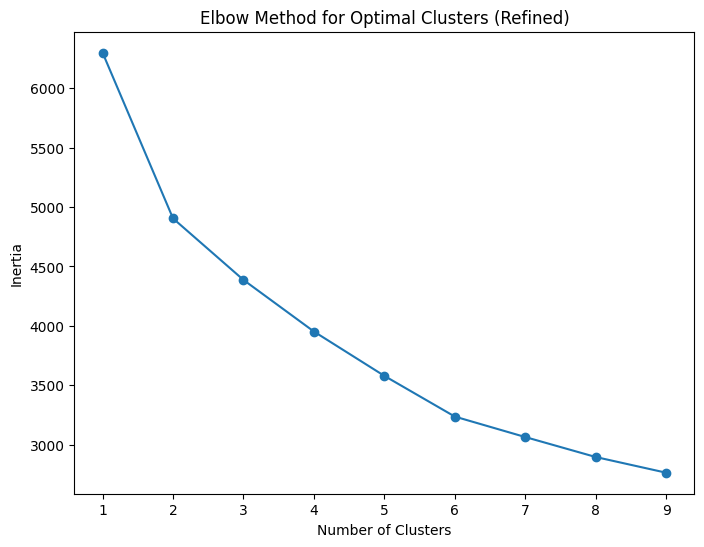

In [21]:

optimized_cluster_range = range(1, 10)

inertia = []
for k in optimized_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(numeric_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(optimized_cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters (Refined)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
kmeans_refined = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_refined = kmeans_refined.fit_predict(numeric_features)

numeric_features_n_escalado['Cluster'] = clusters_refined

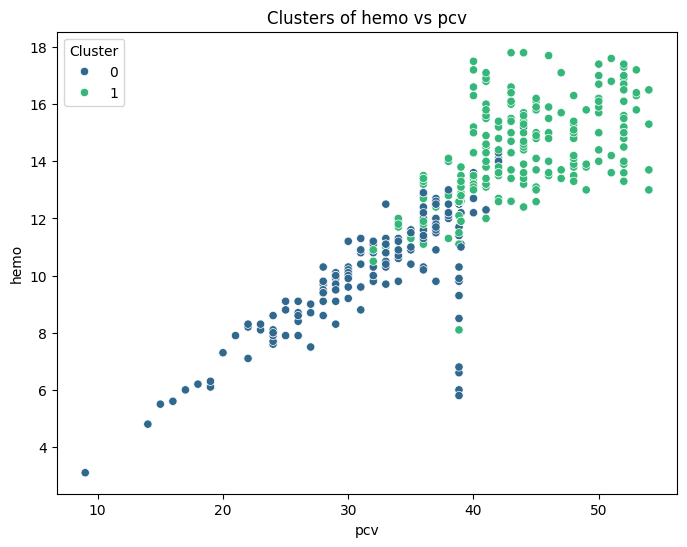

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=numeric_features_n_escalado['pcv'],
    y=numeric_features_n_escalado['hemo'],
    hue=numeric_features_n_escalado['Cluster'],
    palette='viridis'
)
plt.title('Clusters of hemo vs pcv')
plt.xlabel('pcv')
plt.ylabel('hemo')
plt.show()


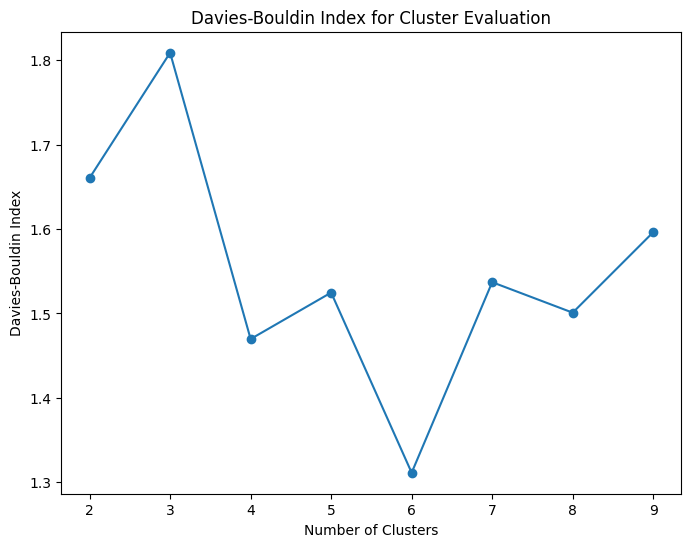

In [24]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []

for k in optimized_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(numeric_features)
    if k > 1:  
        score = davies_bouldin_score(numeric_features, labels)
        davies_bouldin_scores.append(score)
    else:
        davies_bouldin_scores.append(None)  

plt.figure(figsize=(8, 6))
plt.plot(optimized_cluster_range[1:], davies_bouldin_scores[1:], marker='o')
plt.title('Davies-Bouldin Index for Cluster Evaluation')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

label_encoders_2 = {}

le = LabelEncoder()

data_subs_escalado['classification'] = le.fit_transform(data_subs_escalado['classification'])

#le.classes_ = le.classes_[::-1]

label_encoders_2['classification'] = le

print(f"Coluna: {'classification'}")
for i, class_name in enumerate(le.classes_):
    print(f"  {class_name} -> {i}")

y_true = data_subs_escalado['classification']

# Matriz de confusão
confusion = confusion_matrix(y_true, clusters_refined)
print("Confusion Matrix:")
print(confusion)

# Mapeamento de clusters para classes
cluster_to_class = np.argmax(confusion, axis=1)
print("Cluster to Class Mapping:", cluster_to_class)

# Converter clusters para classes reais
mapped_labels = np.array([cluster_to_class[label] for label in clusters_refined])

# Avaliação
accuracy = accuracy_score(y_true, mapped_labels)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_true, mapped_labels))

Coluna: classification
  ckd -> 0
  notckd -> 1
Confusion Matrix:
[[181  69]
 [ 13 187]]
Cluster to Class Mapping: [0 1]
Accuracy: 0.8177777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.82       250
           1       0.73      0.94      0.82       200

    accuracy                           0.82       450
   macro avg       0.83      0.83      0.82       450
weighted avg       0.84      0.82      0.82       450



In [26]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix

# # Set the number of clusters to 4 and re-apply K-Means
# kmeans_refined = KMeans(n_clusters=2, random_state=42, n_init=10)
# clusters_refined = kmeans_refined.fit_predict(numeric_features)

# # Add the cluster labels to the dataset
# numeric_features_n_escalado['Cluster'] = clusters_refined

# # Prepare data for decision tree classification
# # Separate features (X) and the cluster labels (y)
# X = numeric_features_n_escalado.drop(columns=['Cluster'])  # Features
# y = numeric_features_n_escalado['Cluster']  # Labels

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Train a Decision Tree Classifier
# decision_tree = DecisionTreeClassifier(random_state=42)
# decision_tree.fit(X_train, y_train)

# # Predict the cluster labels on the test set
# y_pred = decision_tree.predict(X_test)

# # Evaluate the classification performance
# classification_report_output = classification_report(y_test, y_pred)
# confusion_matrix_output = confusion_matrix(y_test, y_pred)

# # Create a pretty confusion matrix visualization
# def plot_confusion_matrix(cm, labels):
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

# # Assuming the confusion matrix is available
# # Relabeling clusters for clarity in visualization
# unique_clusters = sorted(y.unique())
# plot_confusion_matrix(confusion_matrix_output, labels=unique_clusters)

# print(f"K-Means Report:\n", classification_report_output)


## Codificar variáveis categóricas em valores numéricos

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoders = {}
lista_datasets = [data_subs_escalado, data_subs_normalizado, data_rmv_escalado, data_rmv_normalizado]

for dataset in lista_datasets:
    for column in dataset.select_dtypes(include=['object']).columns:

        # certificar que ele não reconhece vários 'yes' ou 'no'
        dataset[column] = dataset[column].str.strip().str.lower()

        le = LabelEncoder()
        
        dataset[column] = le.fit_transform(dataset[column])
        
        label_encoders[column] = le
        
        print(f"Coluna: {column}")
        for i, class_name in enumerate(le.classes_):
            print(f"  {class_name} -> {i}")

Coluna: rbc
  abnormal -> 0
  normal -> 1
Coluna: pc
  abnormal -> 0
  normal -> 1
Coluna: pcc
  notpresent -> 0
  present -> 1
Coluna: ba
  notpresent -> 0
  present -> 1
Coluna: htn
  no -> 0
  yes -> 1
Coluna: dm
  no -> 0
  yes -> 1
Coluna: cad
  no -> 0
  yes -> 1
Coluna: appet
  good -> 0
  poor -> 1
Coluna: pe
  no -> 0
  yes -> 1
Coluna: ane
  no -> 0
  yes -> 1
Coluna: rbc
  abnormal -> 0
  normal -> 1
Coluna: pc
  abnormal -> 0
  normal -> 1
Coluna: pcc
  notpresent -> 0
  present -> 1
Coluna: ba
  notpresent -> 0
  present -> 1
Coluna: htn
  no -> 0
  yes -> 1
Coluna: dm
  no -> 0
  yes -> 1
Coluna: cad
  no -> 0
  yes -> 1
Coluna: appet
  good -> 0
  poor -> 1
Coluna: pe
  no -> 0
  yes -> 1
Coluna: ane
  no -> 0
  yes -> 1
Coluna: classification
  ckd -> 0
  notckd -> 1
Coluna: pc
  abnormal -> 0
  normal -> 1
Coluna: pcc
  notpresent -> 0
  present -> 1
Coluna: ba
  notpresent -> 0
  present -> 1
Coluna: htn
  no -> 0
  yes -> 1
Coluna: dm
  no -> 0
  yes -> 1
Coluna: cad

In [29]:
print(data_subs_escalado.head())
print(data_rmv_normalizado.head())

   id       age        bp        sg        al        su  rbc  pc  pcc  ba  \
0   0 -0.201037  0.244966  0.496081 -0.108222 -0.484813    1   1    0   0   
1   1 -2.739413 -2.085847  0.496081  2.234008 -0.484813    1   1    0   0   
2   2  0.665725  0.244966 -1.329678  0.672521  2.431340    1   1    0   0   
3   3 -0.201037 -0.531972 -2.242557  2.234008 -0.484813    1   0    1   0   
4   4 -0.015302  0.244966 -1.329678  0.672521 -0.484813    1   1    0   0   

   ...       pcv        wc            rc  htn  dm  cad  appet  pe  ane  \
0  ...  0.669936 -0.208725  5.655443e-01    1   1    0      0   0    0   
1  ... -0.109314 -0.962326 -1.112743e-15    0   0    0      0   0    0   
2  ... -1.018439 -0.334325 -1.112743e-15    0   1    0      1   0    1   
3  ... -0.888564 -0.669259 -1.063145e+00    1   0    0      1   1    1   
4  ... -0.498939 -0.418059 -1.861583e-01    0   0    0      0   0    0   

   classification  
0               0  
1               0  
2               0  
3           

## Remoção de atributos desnecessários

Atributos a remover:
- id;
- mais algum??

In [30]:
for dataset in lista_datasets:
    #dataset = dataset.drop(columns=['id', 'hemo', 'sg', 'pcv'], inplace=True) 
    dataset = dataset.drop(columns=['id'], inplace=True) 
    #dataset = dataset.drop(columns=['id', 'sg', 'hemo'], inplace=True) 
    #dataset = dataset.drop(columns=['id', 'hemo', 'pcv'], inplace=True) 
    #dataset = dataset.drop(columns=['id', 'ba', 'cad', 'pot', 'age', 'pcc', 'wc', 'pcv', 'sg'], inplace=True) 
    #dataset = dataset.drop(columns=['id', 'pcv', 'sg'], inplace=True) 

    #print(dataset.head())

# data_subs_escalado.drop(columns = ['id'], inplace=True)

print(data_subs_escalado.head())

        age        bp        sg        al        su  rbc  pc  pcc  ba  \
0 -0.201037  0.244966  0.496081 -0.108222 -0.484813    1   1    0   0   
1 -2.739413 -2.085847  0.496081  2.234008 -0.484813    1   1    0   0   
2  0.665725  0.244966 -1.329678  0.672521  2.431340    1   1    0   0   
3 -0.201037 -0.531972 -2.242557  2.234008 -0.484813    1   0    1   0   
4 -0.015302  0.244966 -1.329678  0.672521 -0.484813    1   1    0   0   

        bgr  ...       pcv        wc            rc  htn  dm  cad  appet  pe  \
0 -0.336559  ...  0.669936 -0.208725  5.655443e-01    1   1    0      0   0   
1  0.000000  ... -0.109314 -0.962326 -1.112743e-15    0   0    0      0   0   
2  3.922076  ... -1.018439 -0.334325 -1.112743e-15    0   1    0      1   0   
3 -0.392965  ... -0.888564 -0.669259 -1.063145e+00    1   0    0      1   1   
4 -0.548081  ... -0.498939 -0.418059 -1.861583e-01    0   0    0      0   0   

   ane  classification  
0    0               0  
1    0               0  
2    1     

# Modelação

## Dividir os dados em conjuntos de teste e de treino (70/30)

Testar outras partições depois? Ex: 80/20 ?

In [31]:
from sklearn.model_selection import train_test_split

X = data_rmv_normalizado.drop(columns=['classification'])  # Features

# só o target 
y_binary = data_subs_normalizado['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, stratify = y_binary, random_state=42)

print("Distribuição de classes em y_train:")
print(y_train.value_counts())

print("Distribuição de classes em y_test:")
print(y_test.value_counts())

print("Correlação entre as features e a classificação:")
print(data_subs_normalizado.corr()['classification'].sort_values(ascending=False))

#print(X_train.head())

print("Colunas do dataset após one-hot encoding:")
print(X.columns)

print(data_subs_escalado.groupby('classification').mean())

Distribuição de classes em y_train:
classification
0    175
1    140
Name: count, dtype: int64
Distribuição de classes em y_test:
classification
0    75
1    60
Name: count, dtype: int64
Correlação entre as features e a classificação:
classification    1.000000
hemo              0.688246
pcv               0.627301
sg                0.571421
rc                0.567134
sod               0.319032
rbc               0.305451
pc                0.268753
ba               -0.073469
pot              -0.086516
pcc              -0.165145
wc               -0.217976
age              -0.220723
bp               -0.231654
su               -0.240210
cad              -0.255704
sc               -0.312553
ane              -0.350823
appet            -0.373341
bu               -0.396894
pe               -0.403196
bgr              -0.408475
al               -0.426078
dm               -0.591743
htn              -0.622992
Name: classification, dtype: float64
Colunas do dataset após one-hot encoding:
Index(['age

## Regressão Logística

In [32]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)  
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

print('[INFO] - Logistic Regression predictions complete!!')

print("Previsões no conjunto de teste:")
print(y_test[:10])
print(logreg_model.predict(X_test)[:10])


[INFO] - Logistic Regression predictions complete!!
Previsões no conjunto de teste:
246    0
441    1
221    0
58     0
444    1
92     0
397    1
208    0
303    1
99     0
Name: classification, dtype: int64
[0 1 0 0 0 0 1 0 1 0]


## Random Forest e SVC

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print('[INFO] - Random Forest predictions complete!!')
print("Previsões no conjunto de teste:")
print(y_test[:10])
print(rf_model.predict(X_test)[:10])

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print('[INFO] - SVM predictions complete!!')
print("Previsões no conjunto de teste:")
print(y_test[:10])
print(svm_model.predict(X_test)[:10])


importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

[INFO] - Random Forest predictions complete!!
Previsões no conjunto de teste:
246    0
441    1
221    0
58     0
444    1
92     0
397    1
208    0
303    1
99     0
Name: classification, dtype: int64
[0 1 0 0 1 0 1 0 1 0]
[INFO] - SVM predictions complete!!
Previsões no conjunto de teste:
246    0
441    1
221    0
58     0
444    1
92     0
397    1
208    0
303    1
99     0
Name: classification, dtype: int64
[0 1 0 0 1 0 1 0 1 0]
   Feature  Importance
13    hemo    0.210182
10      sc    0.141488
14     pcv    0.116034
16      rc    0.101581
2       sg    0.086977
8      bgr    0.083197
17     htn    0.047892
18      dm    0.043682
9       bu    0.029535
3       al    0.023170
15      wc    0.022110
1       bp    0.017189
4       su    0.014965
11     sod    0.013665
0      age    0.012856
12     pot    0.009113
21      pe    0.008419
20   appet    0.006779
5       pc    0.003804
22     ane    0.003734
6      pcc    0.002117
19     cad    0.001101
7       ba    0.000409


# Avaliação dos modelos

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

logreg_report = classification_report(y_test, y_pred_logreg)
rf_report = classification_report(y_test, y_pred_rf)
svm_report = classification_report(y_test, y_pred_svm)


print(f"LogisticRegression Report:\n", logreg_report)
print(f"RandomForest Report:\n", rf_report)
print(f"SVM LogisticRegression Report:\n", svm_report)

LogisticRegression Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        75
           1       0.90      0.87      0.88        60

    accuracy                           0.90       135
   macro avg       0.90      0.89      0.89       135
weighted avg       0.90      0.90      0.90       135

RandomForest Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.98      0.98      0.98        60

    accuracy                           0.99       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.99      0.99      0.99       135

SVM LogisticRegression Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.93      0.93      0.93        60

    accuracy                           0.94       135
   macro avg       0.94      0.94      0.94   

In [35]:
print("Valores reais:")
print(y_test.values[:20])

print("Previsões LogisticRegression:")
print(y_pred_logreg[:20])

print("Previsões RandomForest:")
print(y_pred_rf[:20])

print("Previsões SVM:")
print(y_pred_svm[:20])

Valores reais:
[0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1]
Previsões LogisticRegression:
[0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1]
Previsões RandomForest:
[0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1]
Previsões SVM:
[0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1]


In [36]:
from sklearn.model_selection import cross_val_score

print("Validação cruzada LogisticRegression:")
logreg_scores = cross_val_score(logreg_model, X_test, y_test, cv=5, scoring='accuracy')

print("Validação cruzada RandomForest:")
rf_scores = cross_val_score(rf_model, X_test, y_test, cv=5, scoring='accuracy')

print("Validação cruzada SVM:")
svm_scores = cross_val_score(svm_model, X_test, y_test, cv=5, scoring='accuracy')


print(f"Logistic Regression Cross-Validation Accuracy: {logreg_scores.mean():.2f}")
print(f"Random Forest Cross-Validation Accuracy: {rf_scores.mean():.2f}")
print(f"SVM Cross-Validation Accuracy: {svm_scores.mean():.2f}")

Validação cruzada LogisticRegression:
Validação cruzada RandomForest:
Validação cruzada SVM:
Logistic Regression Cross-Validation Accuracy: 0.90
Random Forest Cross-Validation Accuracy: 0.99
SVM Cross-Validation Accuracy: 0.90
